# Covid-19 Data Analysis
### Context
From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.


### Content
2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.
[](http://)
The data is available from 22 Jan, 2020.

### Column Description
Main file in this dataset is covid_19_data.csv and the detailed descriptions are below.

covid_19_data.csv

Sno - Serial number<br>
ObservationDate - Date of the observation in MM/DD/YYYY<br>
Province/State - Province or state of the observation (Could be empty when missing)<br>
Country/Region - Country of observation<br>
Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)<br>
Confirmed - Cumulative number of confirmed cases till that date<br>
Deaths - Cumulative number of of deaths till that date<br>
Recovered - Cumulative number of recovered cases till that date<br>
2019_ncov_data.csv<br>


### Acknowledgements
Johns Hopkins University for making the data available for educational and academic research purposes<br>
World Health Organization (WHO): https://www.who.int/

## 1. Extracting data paths
firts we will start by importing some librarries that we will need throughout the data data exploration and cleaning.<br>
and we will also extract the datasets paths to know where we will be reading our data from.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## 2. import and explore the Data

In [ ]:
df_cCov_data = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv")
df_cCov_data

In [ ]:
df_cCov_data["Country/Region"].unique()

After looking at the countries available in our dataset, i will convert both 'Mainland China' and 'Hong Kong' to 'China', and 'UK' to 'United Kingdom'<br>
because 'Mainland China', 'Hong Kong' and 'UK' were not recognized as countries when i tried to make a Geo Map on Data Studio

In [ ]:
df_cCov_data.loc[df_cCov_data['Country/Region'] == 'Mainland China', 'Country/Region'] = 'China'
df_cCov_data.loc[df_cCov_data['Country/Region'] == 'Hong Kong', 'Country/Region'] = 'China'
df_cCov_data.loc[df_cCov_data['Country/Region'] == 'UK', 'Country/Region'] = 'United Kingdom'

In [ ]:
df_cCov_data.info()

We can notice that the data types are acceptable
we can also notice that there are many null values in the 'Province/State' column
I am going to leave it as it is because i am not going to do any analysis over states, only over countries.

In [ ]:
import matplotlib.pyplot as plt
#plt.bar(x = df_cCov_data[df_cCov_data['Country']], height = df_cCov_data[df_cCov_data['Confirmed']])
df_cCov_data[['Confirmed']].plot(kind='line', title ="Confirmed cases line Chart", figsize=(15, 10))


I am going to add another column named 'Rest' because i want to make a comparisson between China and the rest of the world.

In [ ]:
df_cCov_data.loc[df_cCov_data['Country/Region'] == 'China', 'Rest'] = 'China'
df_cCov_data.loc[df_cCov_data['Country/Region'] != 'China', 'Rest'] = 'Rest of the world'

We will now save our data in a csv file.

In [ ]:
#df_cCov_data.drop(df_cCov_data.columns[0],axis=1,inplace=True)
csv_corona = df_cCov_data.to_csv('COVID.csv', index = False)

In [ ]:
df = pd.read_csv('COVID.csv')
df

After i have finnished cleaning and exploring the data, i will transfer the data to Data Studio to perform some visualizations<br>
you can check and play around wit the dashboard through this link : [COVID-19 Dashboard](https://datastudio.google.com/reporting/683fafcf-8bf2-4c6e-b09b-9dc8cb2afcf4)

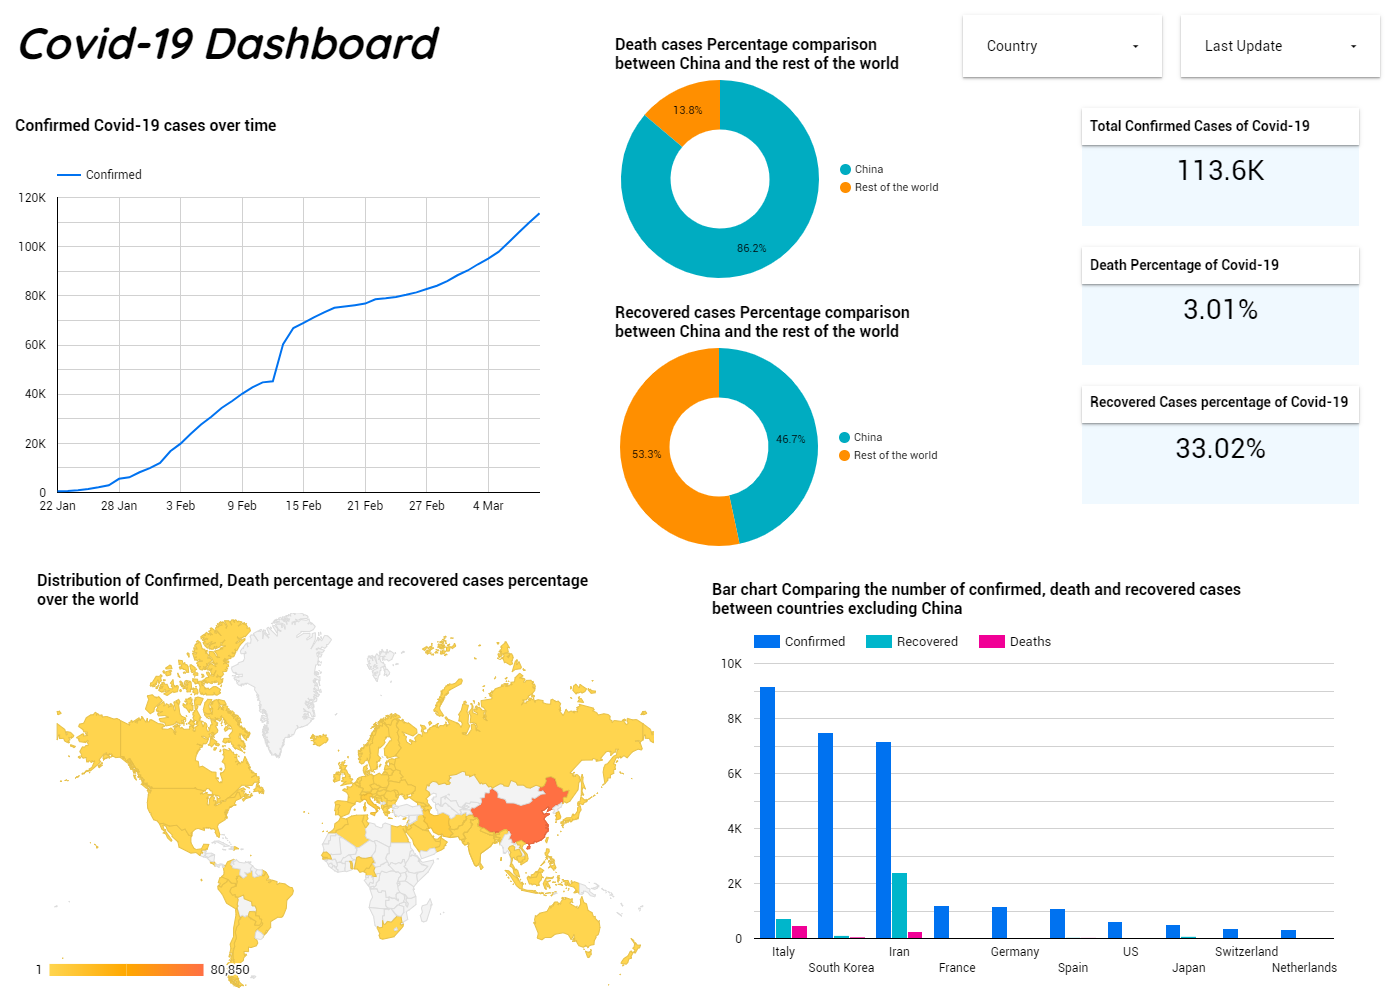

![](http://)